# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [469]:
# Your code here
import pandas as pd

In [470]:
data = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv')
data.columns

Index(['Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Policy Type', 'Vehicle Class', 'Total Claim Amount'],
      dtype='object')

In [471]:
# Step 1: Convert column names to lowercase
data.columns = data.columns.str.lower()

# Step 2: Replace white spaces in column names with underscores
data.columns = data.columns.str.replace(' ', '_')

# Step 3: Replace "st" with "state" in column names
data.columns = data.columns.str.replace('st', 'state')

# Display the modified column names
print(data.columns)

Index(['custateomer', 'state', 'gender', 'education',
       'custateomer_lifetime_value', 'income', 'monthly_premium_auto',
       'number_of_open_complaints', 'policy_type', 'vehicle_class',
       'total_claim_amount'],
      dtype='object')


## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [472]:
# Your code here
gender_mapping = {
    "F": "F",
    "M": "M",
    "Femal": "F",
    "Male": "M",
    "female": "F"
}

# Replace the values in the "Gender" column using the mapping
data['gender'] = data['gender'].replace(gender_mapping)

# Verify the changes
print(data['gender'].value_counts())

F    502
M    452
Name: gender, dtype: int64


In [473]:
# Step 2: Clean State Column
state_mapping = {
    'AZ': 'Arizona',
    'Cali': 'California',
    'WA': 'Washington'
}
data['state'] = data['state'].replace(state_mapping)

# Verify the changes
print(data['state'].value_counts())

California    331
Oregon        320
Arizona       211
Washington    111
Nevada         98
Name: state, dtype: int64


In [474]:
# Step 3: Clean Education Column
data['education'] = data['education'].replace({'Bachelors': 'Bachelor'})

# Verify the changes
print(data['education'].value_counts())

Bachelor                331
College                 313
High School or Below    296
Master                   94
Doctor                   37
Name: education, dtype: int64


In [475]:
data.head()

custateomer       state gender             education  \
0     RB50392  Washington    NaN                Master   
1     QZ44356     Arizona      F              Bachelor   
2     AI49188      Nevada      F              Bachelor   
3     WW63253  California      M              Bachelor   
4     GA49547  Washington      M  High School or Below   

  custateomer_lifetime_value   income  monthly_premium_auto  \
0                        NaN      0.0                1000.0   
1                 697953.59%      0.0                  94.0   
2                1288743.17%  48767.0                 108.0   
3                 764586.18%      0.0                 106.0   
4                 536307.65%  36357.0                  68.0   

  number_of_open_complaints     policy_type  vehicle_class  total_claim_amount  
0                    1/0/00   Personal Auto  Four-Door Car            2.704934  
1                    1/0/00   Personal Auto  Four-Door Car         1131.464935  
2                    1/0/00   Personal Auto   Two-Door Car          566.472247  
3                    1/0/00  Corporate Auto            SUV          529.881344  
4                    1/0/00   Personal Auto  Four-Door Car           17.269323

In [476]:
# Step 4: Clean Customer Lifetime Value Column
data['custateomer_lifetime_value'] = data['custateomer_lifetime_value'].str.rstrip('%').astype(float)

# Verify the changes
data['custateomer_lifetime_value']

0              NaN
1        697953.59
2       1288743.17
3        764586.18
4        536307.65
           ...    
4003           NaN
4004           NaN
4005           NaN
4006           NaN
4007           NaN
Name: custateomer_lifetime_value, Length: 4008, dtype: float64

In [477]:
state_mapping = {
    'AZ': 'Arizona',
    'Cali': 'California',
    'WA': 'Washington'
}
data['state'] = data['state'].replace(state_mapping)

# Verify the changes
print(data['state'].value_counts())

California    331
Oregon        320
Arizona       211
Washington    111
Nevada         98
Name: state, dtype: int64


In [478]:
# Step 5: Clean Vehicle Class Column
vehicle_class_mapping = {
    'Sports Car': 'Luxury',
    'Luxury SUV': 'Luxury',
    'Luxury Car': 'Luxury'
}

data['vehicle_class'] = data['vehicle_class'].replace(vehicle_class_mapping)
'vehicle_class'

#data['vehicle_class']
print(data['vehicle_class'].value_counts(dropna=False))

NaN              2937
Four-Door Car     576
Two-Door Car      205
SUV               199
Luxury             91
Name: vehicle_class, dtype: int64


In [479]:
# Display the cleaned dataframe
data.head()

custateomer       state gender             education  \
0     RB50392  Washington    NaN                Master   
1     QZ44356     Arizona      F              Bachelor   
2     AI49188      Nevada      F              Bachelor   
3     WW63253  California      M              Bachelor   
4     GA49547  Washington      M  High School or Below   

   custateomer_lifetime_value   income  monthly_premium_auto  \
0                         NaN      0.0                1000.0   
1                   697953.59      0.0                  94.0   
2                  1288743.17  48767.0                 108.0   
3                   764586.18      0.0                 106.0   
4                   536307.65  36357.0                  68.0   

  number_of_open_complaints     policy_type  vehicle_class  total_claim_amount  
0                    1/0/00   Personal Auto  Four-Door Car            2.704934  
1                    1/0/00   Personal Auto  Four-Door Car         1131.464935  
2                    1/0/00   Personal Auto   Two-Door Car          566.472247  
3                    1/0/00  Corporate Auto            SUV          529.881344  
4                    1/0/00   Personal Auto  Four-Door Car           17.269323

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [480]:
# Your code here
# Correct the column name to 'Customer Lifetime Value' (assuming this is the actual column name)
data['custateomer_lifetime_value'] = pd.to_numeric(data['custateomer_lifetime_value'], errors='coerce')

In [481]:
data['custateomer_lifetime_value'].dtypes

dtype('float64')

In [482]:
#step 2 Number of open complaints has an incorrect format. 
# Look at the different values it takes with unique() and take the middle value.
data['number_of_open_complaints'].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan],
      dtype=object)

In [483]:
# As an example, 1/5/00 should be 5.
string = '1/5/00'
string.split('/')

['1', '5', '00']

In [484]:
# Number of open complaints is a string - remember you can use split() to deal with it and take the number you need.
# Finally, since it should be numeric, cast the column to be in its proper type
# Split the 'number_of_open_complaints' column by '/'
data['number_of_open_complaints'] = data['number_of_open_complaints'].str.split('/').str[1]

# Convert the extracted portion to numeric (assuming it contains numeric values)
data['number_of_open_complaints'] = pd.to_numeric(data['number_of_open_complaints'], errors='coerce')

In [485]:
data['number_of_open_complaints'].unique()

array([ 0.,  2.,  1.,  3.,  5.,  4., nan])

In [486]:
# Convert 'number_of_open_complaints' column to float
data['number_of_open_complaints'] = data['number_of_open_complaints'].astype(float)

In [487]:
data['number_of_open_complaints'].value_counts(dropna=False)

NaN    2937
0.0     830
1.0     138
2.0      50
3.0      34
4.0      13
5.0       6
Name: number_of_open_complaints, dtype: int64

In [488]:
data.head()

custateomer       state gender             education  \
0     RB50392  Washington    NaN                Master   
1     QZ44356     Arizona      F              Bachelor   
2     AI49188      Nevada      F              Bachelor   
3     WW63253  California      M              Bachelor   
4     GA49547  Washington      M  High School or Below   

   custateomer_lifetime_value   income  monthly_premium_auto  \
0                         NaN      0.0                1000.0   
1                   697953.59      0.0                  94.0   
2                  1288743.17  48767.0                 108.0   
3                   764586.18      0.0                 106.0   
4                   536307.65  36357.0                  68.0   

   number_of_open_complaints     policy_type  vehicle_class  \
0                        0.0   Personal Auto  Four-Door Car   
1                        0.0   Personal Auto  Four-Door Car   
2                        0.0   Personal Auto   Two-Door Car   
3                        0.0  Corporate Auto            SUV   
4                        0.0   Personal Auto  Four-Door Car   

   total_claim_amount  
0            2.704934  
1         1131.464935  
2          566.472247  
3          529.881344  
4           17.269323

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers using `applymap()`.

In [489]:
# Identify any columns with null or missing values.
# Identify how many null values each column has.
# You can use the isnull() function in pandas to find columns with null values.

columns_with_null_values = data.columns[data.isna().any()].tolist()
print("Columns with null values:")
print(columns_with_null_values)

Columns with null values:
['custateomer', 'state', 'gender', 'education', 'custateomer_lifetime_value', 'income', 'monthly_premium_auto', 'number_of_open_complaints', 'policy_type', 'vehicle_class', 'total_claim_amount']


In [490]:
# custateomer_lifetime_value
data['custateomer_lifetime_value'].value_counts(dropna=False)

NaN           2940
445811.34        4
251459.20        4
2412750.40       3
684615.03        3
              ... 
1210120.88       1
245357.08        1
507566.27        1
321497.94        1
899704.02        1
Name: custateomer_lifetime_value, Length: 1028, dtype: int64

In [491]:
data['custateomer_lifetime_value'].mean()

793690.2593445694

In [492]:
mean_value = data['custateomer_lifetime_value'].mean()
data['custateomer_lifetime_value'].fillna(mean_value, inplace=True)

In [493]:
# income
data['income'].value_counts(dropna=False)

NaN        2937
0.0         252
43860.0       4
17622.0       4
14072.0       3
           ... 
58557.0       1
25632.0       1
18768.0       1
47945.0       1
55873.0       1
Name: income, Length: 775, dtype: int64

In [494]:
data['income'].mean()

39295.70121381886

In [495]:
mean_value = data['income'].mean()
data['income'].fillna(mean_value, inplace=True)

In [496]:
data['income'].value_counts(dropna=False)

39295.701214    2937
0.000000         252
43860.000000       4
17622.000000       4
14072.000000       3
                ... 
58557.000000       1
25632.000000       1
18768.000000       1
47945.000000       1
55873.000000       1
Name: income, Length: 775, dtype: int64

In [497]:
# monthly_premium_auto
mean_value = data['monthly_premium_auto'].mean()
data['monthly_premium_auto'].fillna(mean_value, inplace=True)

In [498]:
data['monthly_premium_auto'].value_counts(dropna=False)

193.23436     2937
65.00000        47
63.00000        39
73.00000        37
67.00000        37
              ... 
181.00000        1
276.00000        1
253.00000        1
180.00000        1
1000.00000       1
Name: monthly_premium_auto, Length: 133, dtype: int64

In [499]:
# number_of_open_complaints
mean_value = data['number_of_open_complaints'].mean()
data['number_of_open_complaints'].fillna(mean_value, inplace=True)

In [500]:
data['number_of_open_complaints'].value_counts(dropna=False)

0.394024    2937
0.000000     830
1.000000     138
2.000000      50
3.000000      34
4.000000      13
5.000000       6
Name: number_of_open_complaints, dtype: int64

In [501]:
# total_claim_amount
mean_value = data['total_claim_amount'].mean()
data['total_claim_amount'].fillna(mean_value, inplace=True)

In [502]:
null_mask = data.isna()  # Creates a DataFrame of boolean values
null_count = null_mask.sum()  # Counts null values in each column
print(null_count)

custateomer                   2937
state                         2937
gender                        3054
education                     2937
custateomer_lifetime_value       0
income                           0
monthly_premium_auto             0
number_of_open_complaints        0
policy_type                   2937
vehicle_class                 2937
total_claim_amount               0
dtype: int64


In [571]:
#'state'
data['state'].value_counts(dropna=False)

California    331
Oregon        320
Arizona       211
Washington    111
Nevada         98
NaN             1
Name: state, dtype: int64

In [577]:
mode_value = data['state'].mode()
data['state'].fillna(data['state'].mode()[0], inplace=True)
data['state'].value_counts(dropna=False)

California    332
Oregon        320
Arizona       211
Washington    111
Nevada         98
Name: state, dtype: int64

In [578]:
# gender 
mode_value = data['gender'].mode()
data['gender'].fillna(data['gender'].mode()[0], inplace=True)
data['gender'].value_counts(dropna=False)

F    620
M    452
Name: gender, dtype: int64

In [580]:
# education
mode_value = data['education'].mode()
data['education'].fillna(data['education'].mode()[0], inplace=True)
data['education'].value_counts(dropna=False)

Bachelor                332
College                 313
High School or Below    296
Master                   94
Doctor                   37
Name: education, dtype: int64

In [581]:
# policy_type
mode_value = data['policy_type'].mode()
data['policy_type'].fillna(data['policy_type'].mode()[0], inplace=True)
data['policy_type'].value_counts(dropna=False)

Personal Auto     781
Corporate Auto    234
Special Auto       57
Name: policy_type, dtype: int64

In [582]:
#'vehicle_class'
mode_value = data['vehicle_class'].mode()
data['vehicle_class'].fillna(data['vehicle_class'].mode()[0], inplace=True)
data['vehicle_class'].value_counts(dropna=False)

Four-Door Car    577
Two-Door Car     205
SUV              199
Luxury            91
Name: vehicle_class, dtype: int64

In [583]:
# COLUMN WITH NAN VALUES
data.iloc[1071]

custateomer                             NaN
state                            California
gender                                    F
education                          Bachelor
custateomer_lifetime_value           793690
income                                39295
monthly_premium_auto                    193
number_of_open_complaints                 0
policy_type                   Personal Auto
vehicle_class                 Four-Door Car
total_claim_amount                      404
Name: 1072, dtype: object

In [587]:
null_mask = data.isna()  # Creates a DataFrame of boolean values
null_count = null_mask.sum()  # Counts null values in each column
print(null_count)

custateomer                   0
state                         0
gender                        0
education                     0
custateomer_lifetime_value    0
income                        0
monthly_premium_auto          0
number_of_open_complaints     0
policy_type                   0
vehicle_class                 0
total_claim_amount            0
dtype: int64


In [588]:
# After formatting data types, as a last step, convert all the numeric variables to integers using applymap()
def convert_to_integer(x):
    try:
        return int(x)
    except (ValueError, TypeError):
        return x
data = data.applymap(convert_to_integer)
data.dtypes

custateomer                   object
state                         object
gender                        object
education                     object
custateomer_lifetime_value     int64
income                         int64
monthly_premium_auto           int64
number_of_open_complaints      int64
policy_type                   object
vehicle_class                 object
total_claim_amount             int64
dtype: object

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [589]:
# Your code here
duplicate_rows = data.duplicated()
print(duplicate_rows)

0       False
1       False
2       False
3       False
4       False
        ...  
1066    False
1067    False
1068    False
1069    False
1070    False
Length: 1071, dtype: bool


In [590]:
# Drop all duplicate rows and keep the first occurrence
data = data.drop_duplicates()
print(data.shape)

(1071, 11)


In [591]:
data.to_csv('cleaned_data.csv', index=False)
print(data.to_csv)

<bound method NDFrame.to_csv of      custateomer       state gender             education  \
0        RB50392  Washington      F                Master   
1        QZ44356     Arizona      F              Bachelor   
2        AI49188      Nevada      F              Bachelor   
3        WW63253  California      M              Bachelor   
4        GA49547  Washington      M  High School or Below   
...          ...         ...    ...                   ...   
1066     TM65736      Oregon      M                Master   
1067     VJ51327  California      F  High School or Below   
1068     GS98873     Arizona      F              Bachelor   
1069     CW49887  California      F                Master   
1070     MY31220  California      F               College   

      custateomer_lifetime_value  income  monthly_premium_auto  \
0                         793690       0                  1000   
1                         697953       0                    94   
2                        1288743   48

# lab | customer-analysis-round-3

Show DataFrame info.
Describe DataFrame.
Show a plot of the Gender breakdown.
Show a plot of Income by State.
Show a plot of the Policy Type by the Total Claim Amount.
Show a plot of the Education by Vehicle Class.
What insights can you establish from these plots?
What other plots do you feel would be beneficial?

In [592]:
# Show DataFrame info.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 0 to 1070
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   custateomer                 1071 non-null   object
 1   state                       1071 non-null   object
 2   gender                      1071 non-null   object
 3   education                   1071 non-null   object
 4   custateomer_lifetime_value  1071 non-null   int64 
 5   income                      1071 non-null   int64 
 6   monthly_premium_auto        1071 non-null   int64 
 7   number_of_open_complaints   1071 non-null   int64 
 8   policy_type                 1071 non-null   object
 9   vehicle_class               1071 non-null   object
 10  total_claim_amount          1071 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 100.4+ KB


In [593]:
# Describe DataFrame.
data.describe()

custateomer_lifetime_value        income  monthly_premium_auto  \
count                1.071000e+03   1071.000000           1071.000000   
mean                 7.936898e+05  39295.701214            193.234360   
std                  6.425757e+05  30469.427060           1601.190369   
min                  2.004350e+05      0.000000             61.000000   
25%                  4.048530e+05  14072.000000             68.000000   
50%                  5.887180e+05  36234.000000             83.000000   
75%                  8.945205e+05  64631.000000            109.500000   
max                  5.816655e+06  99960.000000          35354.000000   

       number_of_open_complaints  total_claim_amount  
count                1071.000000         1071.000000  
mean                    0.394024          404.528478  
std                     0.883769          293.041850  
min                     0.000000            0.000000  
25%                     0.000000          201.500000  
50%                     0.000000          354.000000  
75%                     0.000000          532.000000  
max                     5.000000         2893.000000

In [594]:
# Show a plot of the Gender breakdown.
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [595]:
print(data.columns)

Index(['custateomer', 'state', 'gender', 'education',
       'custateomer_lifetime_value', 'income', 'monthly_premium_auto',
       'number_of_open_complaints', 'policy_type', 'vehicle_class',
       'total_claim_amount'],
      dtype='object')


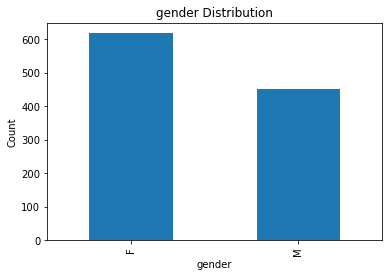

In [596]:
gender_counts = data['gender'].value_counts()
gender_counts.plot(kind='bar')
plt.title('gender Distribution')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

In [597]:
gender_counts = data['gender'].value_counts()
print(gender_counts)

F    619
M    452
Name: gender, dtype: int64


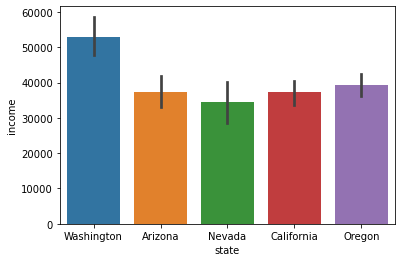

In [598]:
# Show a plot of Income by State.
sns.barplot(x="state", y="income", data=data)
plt.show()

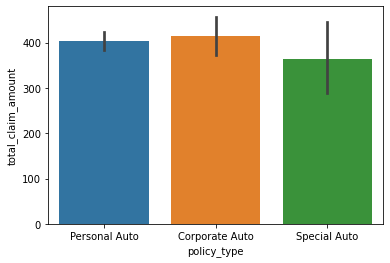

In [599]:
# Show a plot of the Policy Type by the Total Claim Amount.
sns.barplot(x="policy_type", y="total_claim_amount", data=data)
plt.show()

In [600]:
print(data.columns)

Index(['custateomer', 'state', 'gender', 'education',
       'custateomer_lifetime_value', 'income', 'monthly_premium_auto',
       'number_of_open_complaints', 'policy_type', 'vehicle_class',
       'total_claim_amount'],
      dtype='object')


In [601]:
data['education'].unique()

array(['Master', 'Bachelor', 'High School or Below', 'College', 'Doctor'],
      dtype=object)

In [602]:
data['vehicle_class'].unique()

array(['Four-Door Car', 'Two-Door Car', 'SUV', 'Luxury'], dtype=object)

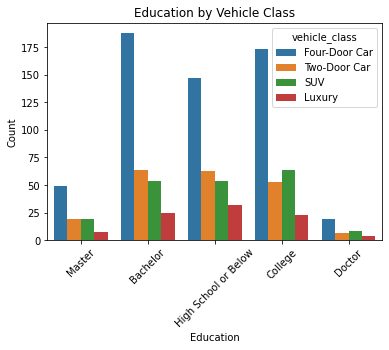

In [603]:
# Show a plot of the Education by Vehicle Class. 
sns.countplot(x='education', hue='vehicle_class', data=data)

# Set labels and title
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Education by Vehicle Class")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

### What insights can you establish from these plots? What other plots do you feel would be beneficial?
* Clients are more female than male
* Washington customers have the highest incomes 
* Personal and corporate auto policies have more claims than specialty auto policies.
* Education does not seem to affect the vehicle class of customers.

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [604]:
# Your code here

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

# lab | customer-analysis-round-4

* Check the data types of the columns. Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical. (You can use np.number and object to select the numerical data types and categorical data types respectively)

* Now we will try to check the normality of the numerical variables visually
    * Use seaborn library to construct distribution plots for the numerical variables
    * Use Matplotlib to construct histograms
    * Do the distributions for different numerical variables look like a normal distribution?
* For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
* Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [605]:
# Your code here
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler

# Check the data types of the columns. 
# Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical.
# (You can use np.number and object to select the numerical data types and categorical data types respectively)
data.columns

Index(['custateomer', 'state', 'gender', 'education',
       'custateomer_lifetime_value', 'income', 'monthly_premium_auto',
       'number_of_open_complaints', 'policy_type', 'vehicle_class',
       'total_claim_amount'],
      dtype='object')

In [606]:
numerical=data.select_dtypes('number')#.columns
numerical.columns

Index(['custateomer_lifetime_value', 'income', 'monthly_premium_auto',
       'number_of_open_complaints', 'total_claim_amount'],
      dtype='object')

In [607]:
numerical.dtypes

custateomer_lifetime_value    int64
income                        int64
monthly_premium_auto          int64
number_of_open_complaints     int64
total_claim_amount            int64
dtype: object

In [608]:
# Now we will try to check the normality of the numerical variables visually
# Use seaborn library to construct distribution plots for the numerical variables
# Use Matplotlib to construct histograms

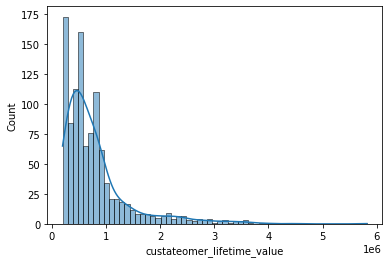

In [609]:
sns.histplot(data['custateomer_lifetime_value'], kde=True)
plt.show()

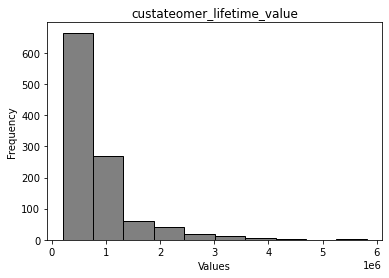

In [610]:
# histogram
plt.hist(data['custateomer_lifetime_value'], bins=10, color='grey', edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('custateomer_lifetime_value')

# Show the histogram
plt.show()

In [611]:
column_data = data['custateomer_lifetime_value']
stat, p = shapiro(column_data)

alpha = 0.05  # significance level
if p > alpha:
    print(f"The data appears to be normally distributed (p={p:.4f})")
else:
    print(f"The data does not appear to be normally distributed (p={p:.4f})")
print("shapiro p_value =",p)

The data does not appear to be normally distributed (p=0.0000)
shapiro p_value = 4.87644298573329e-38


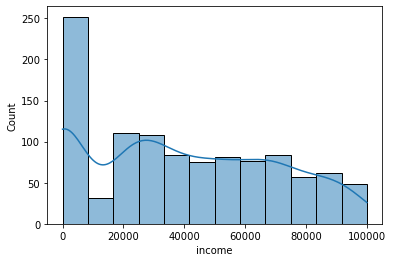

In [612]:
sns.histplot(data['income'], kde=True)
plt.show()

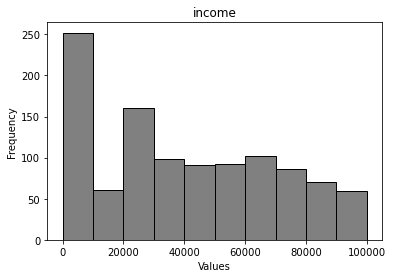

In [613]:
# histogram
plt.hist(data['income'], bins=10, color='grey', edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('income')

# Show the histogram
plt.show()

In [614]:
column_data = data['income']
stat, p = shapiro(column_data)

alpha = 0.05  # significance level
if p > alpha:
    print(f"The data appears to be normally distributed (p={p:.4f})")
else:
    print(f"The data does not appear to be normally distributed (p={p:.4f})")
print("shapiro p_value =",p)

The data does not appear to be normally distributed (p=0.0000)
shapiro p_value = 2.4146999492201514e-22


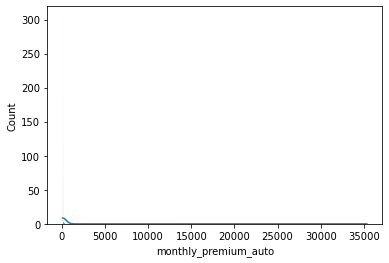

In [615]:
sns.histplot(data['monthly_premium_auto'], kde=True)
plt.show()

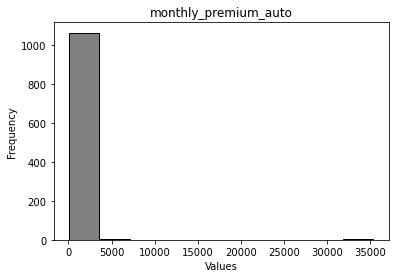

In [616]:
# histogram
plt.hist(data['monthly_premium_auto'], bins=10, color='grey', edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('monthly_premium_auto')

# Show the histogram
plt.show()

In [617]:
values_series = data['monthly_premium_auto'].describe()
print(values_series)

count     1071.000000
mean       193.234360
std       1601.190369
min         61.000000
25%         68.000000
50%         83.000000
75%        109.500000
max      35354.000000
Name: monthly_premium_auto, dtype: float64


In [618]:
type(values_series)

pandas.core.series.Series

In [619]:
data1 = data.sort_values(by='monthly_premium_auto', ascending=True)
data1['monthly_premium_auto'].unique()

array([   61,    62,    63,    64,    65,    66,    67,    68,    69,
          70,    71,    72,    73,    74,    76,    77,    78,    79,
          80,    81,    82,    83,    84,    85,    86,    87,    88,
          89,    90,    91,    92,    93,    94,    95,    96,    97,
          98,    99,   100,   101,   102,   103,   104,   105,   106,
         107,   108,   109,   110,   111,   112,   113,   114,   115,
         116,   117,   118,   119,   121,   123,   124,   125,   126,
         127,   128,   129,   130,   131,   132,   133,   134,   135,
         136,   137,   138,   139,   140,   141,   142,   147,   148,
         150,   152,   153,   154,   156,   159,   160,   161,   165,
         171,   172,   173,   176,   177,   180,   181,   182,   183,
         186,   188,   189,   190,   192,   193,   196,   197,   198,
         199,   203,   206,   210,   217,   225,   230,   237,   239,
         244,   245,   253,   255,   256,   271,   276,   285,   295,
        1000,  1005,

In [620]:
print(data1['monthly_premium_auto'].value_counts(dropna=False))

65       47
63       39
67       37
71       37
73       37
         ..
190       1
141       1
140       1
197       1
35354     1
Name: monthly_premium_auto, Length: 132, dtype: int64


In [621]:
column_data = data['monthly_premium_auto']
stat, p = shapiro(column_data)

alpha = 0.05  # significance level
if p > alpha:
    print(f"The data appears to be normally distributed (p={p:.4f})")
else:
    print(f"The data does not appear to be normally distributed (p={p:.4f})")
print("shapiro p_value =",p)

The data does not appear to be normally distributed (p=0.0000)
shapiro p_value = 0.0


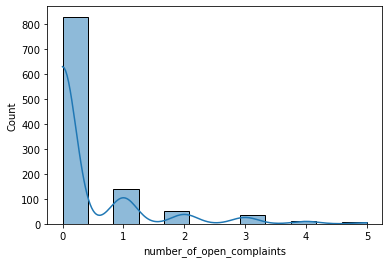

In [622]:
sns.histplot(data['number_of_open_complaints'], kde=True)
plt.show()

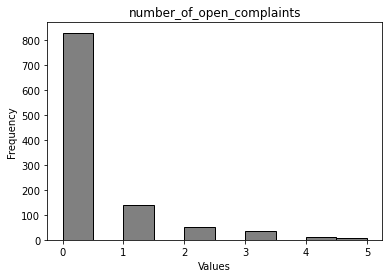

In [623]:
# histogram
plt.hist(data['number_of_open_complaints'], bins=10, color='grey', edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('number_of_open_complaints')

# Show the histogram
plt.show()

In [624]:
column_data = data['number_of_open_complaints']
stat, p = shapiro(column_data)

alpha = 0.05  # significance level
if p > alpha:
    print(f"The data appears to be normally distributed (p={p:.4f})")
else:
    print(f"The data does not appear to be normally distributed (p={p:.4f})")
print("shapiro p_value =",p)

The data does not appear to be normally distributed (p=0.0000)
shapiro p_value = 0.0


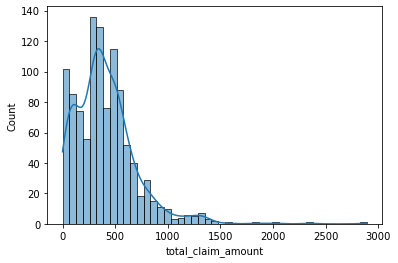

In [625]:
sns.histplot(data['total_claim_amount'], kde=True)
plt.show()

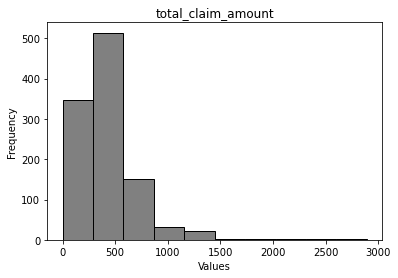

In [626]:
# histogram
plt.hist(data['total_claim_amount'], bins=10, color='grey', edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('total_claim_amount')

# Show the histogram
plt.show()

In [627]:
column_data = data['total_claim_amount']
stat, p = shapiro(column_data)

alpha = 0.05  # significance level
if p > alpha:
    print(f"The data appears to be normally distributed (p={p:.4f})")
else:
    print(f"The data does not appear to be normally distributed (p={p:.4f})")
print("shapiro p_value =",p)

The data does not appear to be normally distributed (p=0.0000)
shapiro p_value = 1.0983529361626824e-27


In [628]:
mea=data['total_claim_amount'].mean()
mea

404.5284780578898

In [629]:
# Do the distributions for different numerical variables look like a normal distribution?
# No, for all of the columns the data does not appear to be normally distributed (p=0.0000)

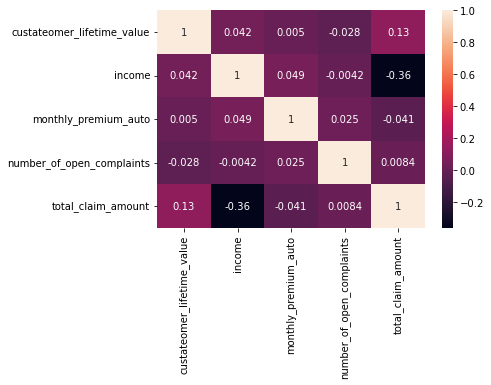

In [630]:
# For the numerical variables, check the multicollinearity between the features. 
# Please note that we will use the column total_claim_amount later as the target variable.

# Drop one of the two features that show a high correlation between them (greater than 0.9). 
# Write code for both the correlation matrix and for seaborn heatmap. 
# If there is no pair of features that have a high correlation, then do not drop any features

correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# We can see that there is a very weak positive/negative correlation

# lab | customer-analysis-round-5

#### Dealing with the data
Already done in the round 2.

#### Explore the data
Done in the round 3.

#### Processing Data
(Further processing...)

* X-y split.
* Scaling (numerical).

# X-y split.

In [631]:
from sklearn import linear_model
import time
from sklearn.metrics import mean_squared_error, r2_score

numerical=data.select_dtypes('number')#.columns
numerical.columns

Index(['custateomer_lifetime_value', 'income', 'monthly_premium_auto',
       'number_of_open_complaints', 'total_claim_amount'],
      dtype='object')

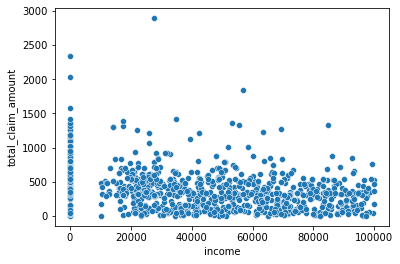

In [632]:
#let's pick the AVGGIFT variable as the one we think is the most explanatory
sns.scatterplot(x='income',y='total_claim_amount',data=numerical)
plt.show()

In [633]:
numerical['income'].corr(numerical['total_claim_amount'])

-0.3612935109708178

In [634]:
y = numerical['total_claim_amount'] #lower case bc it is what we want to predict

In [635]:
X = numerical[['income']]

In [636]:
# %%time
lm = linear_model.LinearRegression()
start_time = time.time()
lm.fit(X,y) #trainning the model
end_time = time.time()
print("b0 = " , lm.intercept_) #intersect of the function (donde se cruzan las lineas)
print("b1 = " , lm.coef_)

b0 =  541.071831408937
b1 =  [-0.00347477]


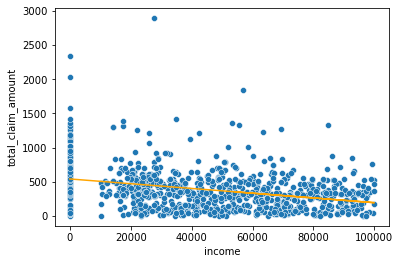

In [637]:
regression_line = lm.intercept_ + lm.coef_[0]*numerical['income']
plt.plot(numerical['income'], regression_line, c = 'orange')
sns.scatterplot(x='income',y='total_claim_amount',data=numerical)
plt.show()

### Scaling (numerical)

In [638]:
transformer = StandardScaler().fit(numerical)
x_standardized = transformer.transform(numerical)
print(x_standardized.shape)
pd.DataFrame(x_standardized, columns=numerical.columns)

(1071, 5)


custateomer_lifetime_value    income  monthly_premium_auto  \
0                   3.605295e-07 -1.290279              0.504089   
1                  -1.490587e-01 -1.290279             -0.062004   
2                   7.707800e-01  0.310991             -0.053257   
3                  -4.531352e-02 -1.290279             -0.054506   
4                  -4.007357e-01 -0.096493             -0.078250   
...                          ...       ...                   ...   
1066               -7.593855e-01 -0.021399             -0.072002   
1067                1.927224e+00  0.785196             -0.057006   
1068               -7.314271e-01 -0.762914             -0.065753   
1069               -5.153703e-01  1.319686             -0.049508   
1070                1.650603e-01  0.490369             -0.050757   

      number_of_open_complaints  total_claim_amount  
0                     -0.446053           -1.374263  
1                     -0.446053            2.480229  
2                     -0.446053            0.551276  
3                     -0.446053            0.424955  
4                     -0.446053           -1.323052  
...                         ...                 ...  
1066                   0.685992           -0.148610  
1067                   1.818038           -0.674377  
1068                  -0.446053            0.780019  
1069                  -0.446053            0.486409  
1070                  -0.446053            0.452268  

[1071 rows x 5 columns]

In [639]:
x_standardized=data.select_dtypes('number')#.columns
x_standardized.columns

Index(['custateomer_lifetime_value', 'income', 'monthly_premium_auto',
       'number_of_open_complaints', 'total_claim_amount'],
      dtype='object')

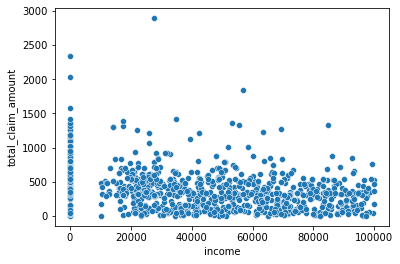

In [640]:
sns.scatterplot(x='income',y='total_claim_amount',data=x_standardized)
plt.show()

In [641]:
x_standardized['income'].corr(x_standardized['total_claim_amount'])

-0.3612935109708178

# Lab | Customer Analysis Round 6
### Round 6
* One Hot/Label Encoding (categorical).
* Concat DataFrames

### Linear Regression
* Train-test split.
* Apply linear regression.

### Model Validation
* Description:
    * R2.
    * MSE.
    * RMSE.
    * MAE.

In [642]:
import pandas as pd
import numpy as np
import math
from sklearn import linear_model

In [643]:
# separate the features from the labels
y = data['total_claim_amount']
X = data.drop(['total_claim_amount'], axis=1)

In [644]:
X.head()

custateomer       state gender             education  \
0     RB50392  Washington      F                Master   
1     QZ44356     Arizona      F              Bachelor   
2     AI49188      Nevada      F              Bachelor   
3     WW63253  California      M              Bachelor   
4     GA49547  Washington      M  High School or Below   

   custateomer_lifetime_value  income  monthly_premium_auto  \
0                      793690       0                  1000   
1                      697953       0                    94   
2                     1288743   48767                   108   
3                      764586       0                   106   
4                      536307   36357                    68   

   number_of_open_complaints     policy_type  vehicle_class  
0                          0   Personal Auto  Four-Door Car  
1                          0   Personal Auto  Four-Door Car  
2                          0   Personal Auto   Two-Door Car  
3                          0  Corporate Auto            SUV  
4                          0   Personal Auto  Four-Door Car

In [645]:
#categorical features and numerical ones are going to be treated differently
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

### Lab | Customer Analysis Round 6 | numerical variables

In [692]:
X_num.columns

Index(['custateomer_lifetime_value', 'income', 'monthly_premium_auto',
       'number_of_open_complaints'],
      dtype='object')

In [646]:
X_num.describe().T

count           mean            std       min  \
custateomer_lifetime_value  1071.0  793689.768441  642575.686389  200435.0   
income                      1071.0   39295.701214   30469.427060       0.0   
monthly_premium_auto        1071.0     193.234360    1601.190369      61.0   
number_of_open_complaints   1071.0       0.394024       0.883769       0.0   

                                 25%       50%       75%        max  
custateomer_lifetime_value  404853.0  588718.0  894520.5  5816655.0  
income                       14072.0   36234.0   64631.0    99960.0  
monthly_premium_auto            68.0      83.0     109.5    35354.0  
number_of_open_complaints        0.0       0.0       0.0        5.0

In [647]:
from sklearn.preprocessing import MinMaxScaler

MinMaxtransformer = MinMaxScaler().fit(X_num)
X_normalized = MinMaxtransformer.transform(X_num)
print(type(X_normalized))
X_normalized = pd.DataFrame(X_normalized,columns=X_num.columns)
display(X_normalized.head())
print(type(X_normalized))

<class 'numpy.ndarray'>


custateomer_lifetime_value    income  monthly_premium_auto  \
0                    0.105632  0.000000              0.026606   
1                    0.088586  0.000000              0.000935   
2                    0.193779  0.487865              0.001332   
3                    0.100450  0.000000              0.001275   
4                    0.059804  0.363715              0.000198   

   number_of_open_complaints  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0

<class 'pandas.core.frame.DataFrame'>


In [648]:
X_normalized.describe().T

count      mean       std  min       25%  \
custateomer_lifetime_value  1071.0  0.105632  0.114414  0.0  0.036398   
income                      1071.0  0.393114  0.304816  0.0  0.140776   
monthly_premium_auto        1071.0  0.003747  0.045368  0.0  0.000198   
number_of_open_complaints   1071.0  0.078805  0.176754  0.0  0.000000   

                                 50%       75%  max  
custateomer_lifetime_value  0.069136  0.123586  1.0  
income                      0.362485  0.646569  1.0  
monthly_premium_auto        0.000623  0.001374  1.0  
number_of_open_complaints   0.000000  0.000000  1.0

### Lab | Customer Analysis Round 6 | categorigal variables

In [649]:
X_cat

custateomer       state gender             education     policy_type  \
0        RB50392  Washington      F                Master   Personal Auto   
1        QZ44356     Arizona      F              Bachelor   Personal Auto   
2        AI49188      Nevada      F              Bachelor   Personal Auto   
3        WW63253  California      M              Bachelor  Corporate Auto   
4        GA49547  Washington      M  High School or Below   Personal Auto   
...          ...         ...    ...                   ...             ...   
1066     TM65736      Oregon      M                Master   Personal Auto   
1067     VJ51327  California      F  High School or Below   Personal Auto   
1068     GS98873     Arizona      F              Bachelor   Personal Auto   
1069     CW49887  California      F                Master    Special Auto   
1070     MY31220  California      F               College   Personal Auto   

      vehicle_class  
0     Four-Door Car  
1     Four-Door Car  
2      Two-Door Car  
3               SUV  
4     Four-Door Car  
...             ...  
1066  Four-Door Car  
1067            SUV  
1068  Four-Door Car  
1069            SUV  
1070   Two-Door Car  

[1071 rows x 6 columns]

In [650]:
X_cat = data.select_dtypes(include = object)

In [679]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_cat)  # Dropping the first varaible of each column
encoded = encoder.transform(X_cat).toarray()
column_names = encoder.get_feature_names_out(input_features=X_cat.columns) # assigning column names
onehot_encoded = pd.DataFrame(encoded, columns=column_names)
onehot_encoded.head()

state_California  state_Nevada  state_Oregon  state_Washington  gender_M  \
0               0.0           0.0           0.0               1.0       0.0   
1               0.0           0.0           0.0               0.0       0.0   
2               0.0           1.0           0.0               0.0       0.0   
3               1.0           0.0           0.0               0.0       1.0   
4               0.0           0.0           0.0               1.0       1.0   

   education_College  education_Doctor  education_High School or Below  \
0                0.0               0.0                             0.0   
1                0.0               0.0                             0.0   
2                0.0               0.0                             0.0   
3                0.0               0.0                             0.0   
4                0.0               0.0                             1.0   

   education_Master  policy_type_Personal Auto  policy_type_Special Auto  \
0               1.0                        1.0                       0.0   
1               0.0                        1.0                       0.0   
2               0.0                        1.0                       0.0   
3               0.0                        0.0                       0.0   
4               0.0                        1.0                       0.0   

   vehicle_class_Luxury  vehicle_class_SUV  vehicle_class_Two-Door Car  
0                   0.0                0.0                         0.0  
1                   0.0                0.0                         0.0  
2                   0.0                0.0                         1.0  
3                   0.0                1.0                         0.0  
4                   0.0                0.0                         0.0

### Lab | Customer Analysis Round 6 | train-test split

In [661]:
# let's merge all this information together into a single dataset with all features, now numerical
X = pd.concat([X_normalized, onehot_encoded], axis=1)  # np.concatenate()

In [662]:
X.head(10)

custateomer_lifetime_value    income  monthly_premium_auto  \
0                    0.105632  0.000000              0.026606   
1                    0.088586  0.000000              0.000935   
2                    0.193779  0.487865              0.001332   
3                    0.100450  0.000000              0.001275   
4                    0.059804  0.363715              0.000198   
5                    0.111319  0.629272              0.000227   
6                    0.060121  0.553721              0.000170   
7                    0.092798  0.000000              0.001133   
8                    0.393915  0.140776              0.000283   
9                    0.095862  0.288235              0.000907   

   number_of_open_complaints  state_California  state_Nevada  state_Oregon  \
0                        0.0               0.0           0.0           0.0   
1                        0.0               0.0           0.0           0.0   
2                        0.0               0.0           1.0           0.0   
3                        0.0               1.0           0.0           0.0   
4                        0.0               0.0           0.0           0.0   
5                        0.0               0.0           0.0           1.0   
6                        0.0               0.0           0.0           1.0   
7                        0.0               0.0           0.0           0.0   
8                        0.0               0.0           0.0           1.0   
9                        0.0               0.0           0.0           1.0   

   state_Washington  gender_M  education_College  education_Doctor  \
0               1.0       0.0                0.0               0.0   
1               0.0       0.0                0.0               0.0   
2               0.0       0.0                0.0               0.0   
3               0.0       1.0                0.0               0.0   
4               1.0       1.0                0.0               0.0   
5               0.0       0.0                0.0               0.0   
6               0.0       0.0                1.0               0.0   
7               0.0       1.0                0.0               0.0   
8               0.0       1.0                0.0               0.0   
9               0.0       0.0                1.0               0.0   

   education_High School or Below  education_Master  \
0                             0.0               1.0   
1                             0.0               0.0   
2                             0.0               0.0   
3                             0.0               0.0   
4                             1.0               0.0   
5                             0.0               0.0   
6                             0.0               0.0   
7                             0.0               1.0   
8                             0.0               0.0   
9                             0.0               0.0   

   policy_type_Personal Auto  policy_type_Special Auto  vehicle_class_Luxury  \
0                        1.0                       0.0                   0.0   
1                        1.0                       0.0                   0.0   
2                        1.0                       0.0                   0.0   
3                        0.0                       0.0                   0.0   
4                        1.0                       0.0                   0.0   
5                        1.0                       0.0                   0.0   
6                        0.0                       0.0                   0.0   
7                        0.0                       0.0                   0.0   
8                        0.0                       0.0                   0.0   
9                        0.0                       1.0                   0.0   

   vehicle_class_SUV  vehicle_class_Two-Door Car  
0                0.0                         0.0  
1                0.0                         0.0  
2                

In [663]:
print(X.shape)
print(y.shape)

(1071, 18)
(1071,)


In [664]:
# train test split is the way ML generates its claim to fame: 
# we build the model on a portion of the data but we then validate it in 
# another "fresh" portion
# our model has no opportunity to "cheat": it must accurately guess the values 
# in the "fresh" dataset that it never saw before
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# test_size 20% es el tamaño de la muestra asignada a test

In [665]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(856, 18)
(215, 18)
(856,)
(215,)


In [666]:
X_train.head()

custateomer_lifetime_value    income  monthly_premium_auto  \
1010                    0.097193  0.702911              0.000907   
688                     0.167839  0.932473              0.000283   
243                     0.078423  0.500080              0.000652   
948                     0.177739  0.875950              0.001048   
798                     0.006936  0.000000              0.000255   

      number_of_open_complaints  state_California  state_Nevada  state_Oregon  \
1010                        0.0               1.0           0.0           0.0   
688                         0.0               0.0           0.0           1.0   
243                         1.0               1.0           0.0           0.0   
948                         0.2               0.0           0.0           0.0   
798                         0.0               1.0           0.0           0.0   

      state_Washington  gender_M  education_College  education_Doctor  \
1010               0.0       0.0                1.0               0.0   
688                0.0       1.0                0.0               0.0   
243                0.0       1.0                1.0               0.0   
948                0.0       0.0                0.0               0.0   
798                0.0       1.0                1.0               0.0   

      education_High School or Below  education_Master  \
1010                             0.0               0.0   
688                              0.0               0.0   
243                              0.0               0.0   
948                              0.0               1.0   
798                              0.0               0.0   

      policy_type_Personal Auto  policy_type_Special Auto  \
1010                        0.0                       0.0   
688                         1.0                       0.0   
243                         1.0                       0.0   
948                         1.0                       0.0   
798                         1.0                       0.0   

      vehicle_class_Luxury  vehicle_class_SUV  vehicle_class_Two-Door Car  
1010                   0.0                0.0                         1.0  
688                    0.0                0.0                         1.0  
243                    0.0                0.0                         1.0  
948                    0.0                0.0                         1.0  
798                    0.0                0.0                         0.0

In [667]:
y_train.head()

1010      7
688      74
243     566
948     470
798     425
Name: total_claim_amount, dtype: int64

### Lab | Customer Analysis Round 6 | Apply linear regression

In [668]:
#we train/fit our model like yesterday
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Lab | Customer Analysis Round 6 | Description

In [676]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.3837567551427754

In [670]:
# But now we evaluate it in the TEST portion of the data, that we did not use for training.
# This way we know our model is genuinely guessing our donations, not just repeating the values it has seen in the training data
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test) # R-squared(Coefficient of determination) good value > 0.95

0.31301802321891725

In [673]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse # MSE(Mean Squared Error) Lower (close to 0) the MSE, the closer is forecast to actual

43337.07678263868

In [674]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse # RMSE(Root Mean Squared Error) values between 0.2 and 0.5

208.1755912268263

In [675]:
y_test.mean()

390.0883720930233

# Lab | customer-analysis-round-7

## Lab | customer-analysis-round-7 | Modeling

In [ ]:
# Try to improve the linear regression model.

In [943]:
y = data['total_claim_amount']
X = data.drop(['total_claim_amount'], axis=1)

In [944]:
# categorical features and numerical ones are going to be treated differently
X_num_i = X.select_dtypes(include = np.number)
X_cat_i = X.select_dtypes(include = object)

#### Modeling | Change numerical | Strategy 1 Drop numerical columns

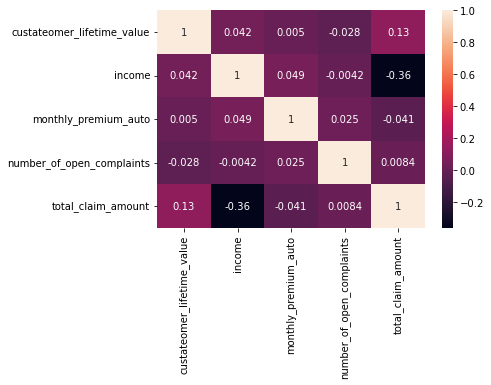

In [904]:
#1.1 Change numerical
# Drop numerical columns with low correlation with target column
numerical=data.select_dtypes('number')#.columns
numerical.columns
correlations_matrix = numerical.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [905]:
X_num_i.columns

Index(['custateomer_lifetime_value', 'income', 'monthly_premium_auto',
       'number_of_open_complaints'],
      dtype='object')

In [906]:
import pandas as pd
X_num_i = X_num_i.drop(['monthly_premium_auto','number_of_open_complaints'], axis=1)
X_num_i.columns

Index(['custateomer_lifetime_value', 'income'], dtype='object')

In [907]:
#1.2 Normalizing New numerical
MinMaxtransformer = MinMaxScaler().fit(X_num_i)
X_normalized_i = MinMaxtransformer.transform(X_num_i)
print(type(X_normalized_i))
X_normalized_i = pd.DataFrame(X_normalized_i,columns=X_num_i.columns)
display(X_normalized_i.head())
print(type(X_normalized_i))

<class 'numpy.ndarray'>


custateomer_lifetime_value    income
0                    0.105632  0.000000
1                    0.088586  0.000000
2                    0.193779  0.487865
3                    0.100450  0.000000
4                    0.059804  0.363715

<class 'pandas.core.frame.DataFrame'>


#### Modeling | Change categorical | Strategy 3 Drop categorical columns

In [945]:
#2.1 Drop Categorical columns
X_cat_i.columns # usar solo numerical columns (gender es importante pero el resto no)

Index(['custateomer', 'state', 'gender', 'education', 'policy_type',
       'vehicle_class'],
      dtype='object')

In [946]:
X_cat_i = X_cat_i.drop(['custateomer'], axis=1)
X_cat_i.columns

Index(['state', 'gender', 'education', 'policy_type', 'vehicle_class'], dtype='object')

In [947]:
#2.2 Encoding categorical
encoder = OneHotEncoder(drop='first').fit(X_cat_i)  # Dropping the first varaible of each column
encoded = encoder.transform(X_cat_i).toarray()
column_names = encoder.get_feature_names_out(input_features=X_cat_i.columns) # assigning column names
onehot_encoded = pd.DataFrame(encoded, columns=column_names)
onehot_encoded.head()

state_California  state_Nevada  state_Oregon  state_Washington  gender_M  \
0               0.0           0.0           0.0               1.0       0.0   
1               0.0           0.0           0.0               0.0       0.0   
2               0.0           1.0           0.0               0.0       0.0   
3               1.0           0.0           0.0               0.0       1.0   
4               0.0           0.0           0.0               1.0       1.0   

   education_College  education_Doctor  education_High School or Below  \
0                0.0               0.0                             0.0   
1                0.0               0.0                             0.0   
2                0.0               0.0                             0.0   
3                0.0               0.0                             0.0   
4                0.0               0.0                             1.0   

   education_Master  policy_type_Personal Auto  policy_type_Special Auto  \
0               1.0                        1.0                       0.0   
1               0.0                        1.0                       0.0   
2               0.0                        1.0                       0.0   
3               0.0                        0.0                       0.0   
4               0.0                        1.0                       0.0   

   vehicle_class_Luxury  vehicle_class_SUV  vehicle_class_Two-Door Car  
0                   0.0                0.0                         0.0  
1                   0.0                0.0                         0.0  
2                   0.0                0.0                         1.0  
3                   0.0                1.0                         0.0  
4                   0.0                0.0                         0.0

In [948]:
#2.3 Concatenate numerical-categorical
X = pd.concat([X_normalized_i, onehot_encoded], axis=1)  # np.concatenate()
X.head()

custateomer_lifetime_value    income  state_California  state_Nevada  \
0                    0.105632  0.000000               0.0           0.0   
1                    0.088586  0.000000               0.0           0.0   
2                    0.193779  0.487865               0.0           1.0   
3                    0.100450  0.000000               1.0           0.0   
4                    0.059804  0.363715               0.0           0.0   

   state_Oregon  state_Washington  gender_M  education_College  \
0           0.0               1.0       0.0                0.0   
1           0.0               0.0       0.0                0.0   
2           0.0               0.0       0.0                0.0   
3           0.0               0.0       1.0                0.0   
4           0.0               1.0       1.0                0.0   

   education_Doctor  education_High School or Below  education_Master  \
0               0.0                             0.0               1.0   
1               0.0                             0.0               0.0   
2               0.0                             0.0               0.0   
3               0.0                             0.0               0.0   
4               0.0                             1.0               0.0   

   policy_type_Personal Auto  policy_type_Special Auto  vehicle_class_Luxury  \
0                        1.0                       0.0                   0.0   
1                        1.0                       0.0                   0.0   
2                        1.0                       0.0                   0.0   
3                        0.0                       0.0                   0.0   
4                        1.0                       0.0                   0.0   

   vehicle_class_SUV  vehicle_class_Two-Door Car  
0                0.0                         0.0  
1                0.0                         0.0  
2                0.0                         1.0  
3                1.0                         0.0  
4                0.0                         0.0

#### Modeling | Change model | Strategy 2 Change model

In [970]:
#3.2 Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [971]:
#3.3 Train/fit model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [972]:
#4.1. R_square
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.3693467009411834

In [973]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test) # R-squared(Coefficient of determination) good value > 0.95

0.4151081798301778

In [974]:
#4.2 MSE
mse=mean_squared_error(y_test,predictions_test)
mse # MSE(Mean Squared Error) Lower (close to 0) the MSE, the closer is forecast to actual

40243.125146695485

In [975]:
#4.3 RMSE
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse # RMSE(Root Mean Squared Error) values between 0.2 and 0.5

200.60689207177177